# Homework 8: Confidence Intervals

**Reading**: 
* [Estimation](https://www.inferentialthinking.com/chapters/13/Estimation.html)

Please complete this notebook by filling in the cells provided. Directly sharing answers is not okay, but discussing problems with the course staff or with other students is encouraged. For all problems that you must write out explanations, you **must** provide your answer in the designated space. Moreover, throughout this homework and all future ones, please be sure to not re-assign variables throughout the notebook! 

In [6]:
# Don't change this cell; just run it.   

import numpy as np
from datascience import *

# These lines do some fancy plotting magic.
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import warnings
warnings.simplefilter('ignore', FutureWarning)

## 1. Thai Restaurants


Joe and Peter are trying see what the best Thai restaurant is in Chapel Hill & Carrboro. They survey 1500 UNC students selected uniformly at random, and ask each student what Thai restaurant is the best (*Note: this data is fabricated for the purposes of this homework*). The choices of Thai restaurant are Thai Palace, Cham Thai, Bangkok 54, and Thai Station. After compiling the results, Joe and Peter release the following percentages from their sample:

|Thai Restaurant  | Percentage|
|:------------:|:------------:|
|Thai Palace | 8% |
|Cham Thai | 52% |
|Bangkok 54 | 25% |
|Thai Station | 15% |

We will attempt to estimate the corresponding *parameters*, or the percentage of the votes that each restaurant will receive from the entire population (the entire population is all UNC students). We will use confidence intervals to compute a range of values that reflects the uncertainty of our estimates.

The table `votes` contains the results of the survey.

In [7]:
# Just run this cell
votes = Table.read_table('votesUNC.csv')
votes

Vote
Thai Palace
Thai Palace
Thai Palace
Thai Palace
Thai Palace
Thai Palace
Thai Palace
Thai Palace
Thai Palace
Thai Palace


**Question 1.** Complete the function `one_resampled_percentage` below. It should return Cham Thai's **percentage** of votes after simulating one bootstrap sample of `tbl`.

**Note:** `tbl` will always be in the same format as `votes`.

<!--
BEGIN QUESTION
name: q1_1
manual: false
-->

In [36]:
def one_resampled_percentage(tbl):
    return tbl.sample(100, with_replacement = False).where('Vote', 'Cham Thai').num_rows / 100
     
one_resampled_percentage(votes)

0.51

**Question 2.** Complete the `percentages_in_resamples` function such that it returns an array of 2500 bootstrapped estimates of the percentage of voters who will vote for Cham Thai. You should use the `one_resampled_percentage` function you wrote above.

<!--
BEGIN QUESTION
name: q1_2
manual: false
-->

In [37]:
def percentages_in_resamples():
    percentage_cham = make_array()
    
    for i in np.arange(2500):
        one_percentage = one_resampled_percentage(votes)
        percentage_cham = np.append(percentage_cham, one_percentage)
        
    return percentage_cham

In the following cell, we run the function you just defined, `percentages_in_resamples`, and create a histogram of the calculated statistic for the 2,500 bootstrap estimates of the percentage of voters who voted for Cham Thai. Based on what the original Thai restaurant percentages were, does the graph seem reasonable? 

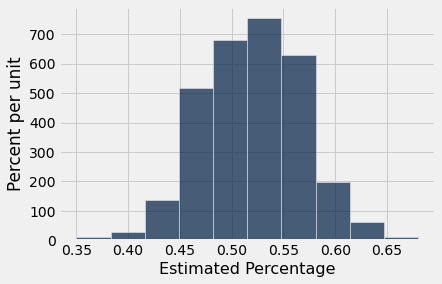

In [38]:
resampled_percentages = percentages_in_resamples()
Table().with_column('Estimated Percentage', resampled_percentages).hist("Estimated Percentage")

**Question 3.** Using the array `resampled_percentages`, find the values at the two edges of the middle 95% of the bootstrapped percentage estimates. (Compute the lower and upper ends of the interval, named `cham_lower_bound` and `cham_upper_bound`, respectively.)

<!--
BEGIN QUESTION
name: q1_3
manual: false
-->

In [41]:
cham_lower_bound = percentile(2.5, resampled_percentages)
cham_upper_bound = percentile(97.5, resampled_percentages)
print("Bootstrapped 95% confidence interval for the percentage of Cham Thai voters in the population: [{:f}, {:f}]".format(cham_lower_bound, cham_upper_bound))

Bootstrapped 95% confidence interval for the percentage of Cham Thai voters in the population: [0.430000, 0.610000]


**Question 4.** The survey results seem to indicate that Cham Thai is beating all the other Thai restaurants combined among voters. We would like to use confidence intervals to determine a range of likely values for Cham Thai's true lead over all the other restaurants combined. The calculation for Cham Thai's lead over Thai Palace, Bangkok 54, and Thai Station combined is:

$$\text{Chamm Thai's % of the vote} - \text{(Thai Palace's % of the vote + Bangkok 54's % of the vote + Thai Station's % of the vote)}$$

Define the function `one_resampled_difference` that returns **exactly one value** of Cham Thai's percentage lead over Thai Palace, Bangkok 54, and Thai Station combined from one bootstrap sample of `tbl`.

<!--
BEGIN QUESTION
name: q1_4
manual: false
-->

In [58]:
def one_resampled_difference(tbl):
    bootstrap = tbl.sample(100, with_replacement = False)
    cham_percentage = bootstrap.where('Vote', 'Cham Thai').num_rows
    tp_percentage = bootstrap.where('Vote', 'Thai Palace').num_rows
    b54_percentage = bootstrap.where('Vote', 'Bangkok 54').num_rows
    ts_percentage = bootstrap.where('Vote', 'Thai Station').num_rows
    return cham_percentage - (tp_percentage + b54_percentage +  ts_percentage)

**Question 5.**
Write a function called `leads_in_resamples` that finds 2,500 bootstrapped estimates (the result of calling `one_resampled_difference`) of Cham Thai's lead over Thai Palace, Bangkok 54, and Thai station combined. Plot a histogram of the resulting samples. 

**Note:** Cham Thai's lead can be negative.

<!--
BEGIN QUESTION
name: q1_5
manual: true
-->
<!-- EXPORT TO PDF -->

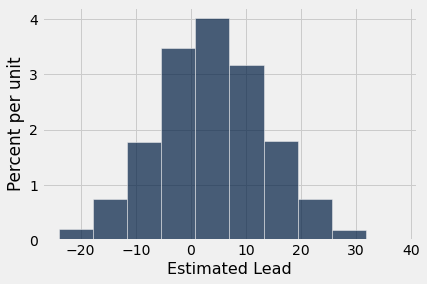

In [63]:
def leads_in_resamples():
    leads = make_array()
    
    for i in np.arange(2500):
        one_lead = one_resampled_difference(votes)
        leads = np.append(leads, one_lead)
    
    return leads

sampled_leads = leads_in_resamples()
Table().with_column('Estimated Lead', sampled_leads).hist("Estimated Lead")

**Question 6.** Use the simulated data from Question 5 to compute an approximate 95% confidence interval for Cham Thai's true lead over Thai Palace, Bangkok 54, and Thai station combined.

<!--
BEGIN QUESTION
name: q1_6
manual: false
-->

In [64]:
diff_lower_bound = percentile(2.5, sampled_leads)
diff_upper_bound = percentile(97.5, sampled_leads)
print("Bootstrapped 95% confidence interval for Cham Thai's true lead over Thai Palace, Bangkok 54, and Thai station combined: [{:f}, {:f}]".format(diff_lower_bound, diff_upper_bound))

Bootstrapped 95% confidence interval for Cham Thai's true lead over Thai Palace, Bangkok 54, and Thai station combined: [-14.000000, 22.000000]


## 2. Interpreting Confidence Intervals


Dr. McLean computed the following 95% confidence interval for the percentage of Cham Thai voters: 

$$[49.40, 54.47]$$

(Your answer may have been a bit different; that doesn't mean it was wrong!)

#### Question 1
Can we say there is a 95% probability that the interval [49.40, 54.47] contains the true percentage of the population that votes for Cham Thai as the best Thai restaurant in Chapel Hill & Carrboro? Answer "yes" or "no" and explain your reasoning. 

*Note:* ambiguous answers using language like "sometimes" or "maybe" will not receive credit.

<!--
BEGIN QUESTION
name: q2_1
manual: true
-->
<!-- EXPORT TO PDF -->

*No, we cannot say that there is a 95% probability that the interval contains the true percentage. The interval will either have the true percentage or it will not. Our confidence interval is just the range in which 95% of our sampled percentages lie.*

#### Question 2

Dr. McLean also created 70%, 90%, and 99% confidence intervals from the same sample, but he forgot to label which confidence interval represented which percentages! Match each confidence level (70%, 90%, 99%) with its corresponding interval in the cell below (e.g. __ % CI: [49.87, 54.0] $\rightarrow$ replace the blank with one of the three confidence levels). **Then**, explain your thought process and how you came up with your answers.

The intervals are below:

* [49.87, 54.00]
* [50.67, 53.27]
* [48.80, 55.40]

<!--
BEGIN QUESTION
name: q2_2
manual: true
-->
<!-- EXPORT TO PDF -->

*99% CI: [48.80, 55.40]*

*90% CI: [49.87, 54.00]*

*70% CI: [50.67, 53.27]*

*Since the 99% Confidence Interval will contain 99% of the sampled percentages, it must have the largest range.  The 90% will have a smaller range since it only contains 90%, and the 70% will have the smallest range.*

#### Question 3
Suppose that we produced 2,500 new samples (each one a uniform random sample of 1,500 voters/students) from the population and created a 90% confidence interval from each one. Roughly how many of those 2,500 intervals do you expect will actually contain the true percentage of the population?

Assign your answer to `true_percentage_intervals`.

<!--
BEGIN QUESTION
name: q2_3
manual: false
-->

In [66]:
true_percentage_intervals = 2250
true_percentage_intervals

2250

Recall the second bootstrap confidence interval you created, which estimated Cham Thai's lead over Thai Palace, Bangkok 54, and Thai station combined. Among
voters in the sample, Cham Thai's lead was 4%. Dr. McLean's 95% confidence interval for the true lead (in the population of all voters) was

$$[-0.80, 8.80]$$

Suppose we are interested in testing a simple yes-or-no question:

> "Is the percentage of votes for Cham Thai tied with the percentage of votes for Thai Palace, Bangkok 54, and Thai station combined?"

Our null hypothesis is that the percentages are equal, or equivalently, that Cham Thai's lead is exactly 0. Our alternative hypothesis is that Cham Thai's lead is not equal to 0.  In the questions below, don't compute any confidence interval yourself - use only Dr. McLean's 95% confidence interval.


**Question 4** 

Say we use a 5% P-value cutoff.  Do we reject the null, fail to reject the null, or are we unable to tell using our staff confidence interval?

Assign `restaurants_tied` to the number corresponding to the correct answer.

1. Reject the null / Data is consistent with the alternative hypothesis
2. Fail to reject the null / Data is consistent with the null hypothesis
3. Unable to tell using Dr. McLean's confidence interval

*Hint:* If you're confused, take a look at [this chapter](https://inferentialthinking.com/chapters/13/4/Using_Confidence_Intervals.html) of the textbook.

<!--
BEGIN QUESTION
name: q2_4
manual: false
-->

In [70]:
restaurants_tied = 3

#### Question 5
What if, instead, we use a P-value cutoff of 1%? Do we reject the null, fail to reject the null, or are we unable to tell using Dr. McLean's confidence interval?

Assign `cutoff_one_percent` to the number corresponding to the correct answer.

1. Reject the null / Data is consistent with the alternative hypothesis
2. Fail to reject the null / Data is consistent with the null hypothesis
3. Unable to tell using Dr. McLean's confidence interval

<!--
BEGIN QUESTION
name: q2_5
manual: false
-->

In [71]:
cutoff_one_percent = 2

#### Question 6
What if we use a P-value cutoff of 10%? Do we reject, fail to reject, or are we unable to tell using our confidence interval?

Assign `cutoff_ten_percent` to the number corresponding to the correct answer.

1. Reject the null / Data is consistent with the alternative hypothesis
2. Fail to reject the null / Data is consistent with the null hypothesis
3. Unable to tell using Dr. McLean's confidence interval

<!--
BEGIN QUESTION
name: q2_6
manual: false
-->

In [72]:
cutoff_ten_percent = 1